In [1]:
import functions as f # Module of custom plotting functions
import xarray as xr 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cftime
import scipy.stats as stats
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

/emmy-noether/home/sr850/isca_results/my_results/functions.py:38: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('Latitude ($^\circ$N)', fontsize =13)
/emmy-noether/home/sr850/isca_results/my_results/functions.py:75: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Latitude ($^\circ$N)')


In [2]:
plt.rcParams['font.size'] = 12          # Default text size
plt.rcParams['axes.titlesize'] = 16     # Title font size
plt.rcParams['axes.labelsize'] = 13     # X and Y axis labels font size
plt.rcParams['xtick.labelsize'] = 12    # X tick labels font size
plt.rcParams['ytick.labelsize'] = 12    # Y tick labels font size
plt.rcParams['legend.fontsize'] = 13    # Legend font size
plt.rcParams['figure.titlesize'] = 18   # Figure title font size

In [3]:
base_dir = '/home/links/sr850/isca_data/'
# Control Data
exp_name = 'CONTROL_exp_no_ml_sara'
control_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_half_monthly.nc' for file_idx in range(1, 241)]
control_full = xr.open_mfdataset(control_files, use_cftime=True)

exp_name = 'ML_exp_std_calculated_half_monthly_randommultiplebetweenplusorminusone_sara'
ml_files = [f'{base_dir}/{exp_name}/run{file_idx:04d}/atmos_half_monthly.nc' for file_idx in range(1, 241)]
ml_full = xr.open_mfdataset(ml_files, use_cftime=True)

Time Series of Global Mean 2m Temp and Precipitation

In [ ]:
f.plotting_gm_timeseries([control_full, ml_full],'temp_2m',ylabel = '2m Temperature (K)', legendlabel=['Control', 'ML'])
plt.title('Global Mean 2m Temperature')
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_t2m_timeseries.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
f.plotting_gm_timeseries([control_full, ml_full],'precipitation',ylabel = 'Precipitation (mm / month)', legendlabel=['Control', 'ML'])
plt.title('Global Mean Precipitation')
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_precipitation_timeseries.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
f.plotting_gm_timeseries([control_full, ml_full],'rh_2m',ylabel = '2m Relative Humidity (%)', legendlabel=['Control', 'ML'])
plt.title('Global Mean 2m Relative Humidity')
plt.legend(bbox_to_anchor=(1.2, 1))
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_rh_2m_timeseries.png', bbox_inches='tight', pad_inches=0.1)

In [ ]:
f.plotting_gm_timeseries([control_full, ml_full],'sphum_2m',ylabel = '2m Specific Humidity (kg/kg)', legendlabel=['Control', 'ML'])
plt.title('Global Mean 2m Specific Humidity')
plt.legend(bbox_to_anchor=(1, 1))
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_sphum_2m_timeseries.png', bbox_inches='tight', pad_inches=0.1)

Discarding the first 4 years from when ML switched on

In [4]:
ml = ml_full.sel(time = slice('0015', '0020'))
control = control_full.sel(time = slice('0015', '0020'))

RH Distributions 

/tmp/ipykernel_45031/2254388559.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


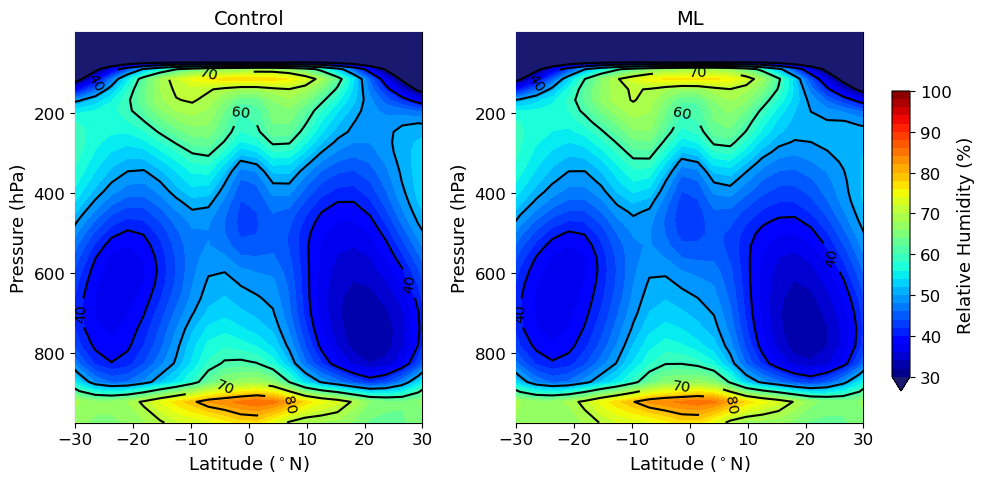

In [7]:
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(9, 5))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 40, 50, 60, 70, 80, 90] # contour line levels
Z = 30 # zoom

cont = f.zonal_mean_rh_plot_for_grid(control,ax = axs[0], exp = 'Control' , levels = L, zoom=Z, contour_levels = lines, seasonal_avg = True, Season = 'DJF', sub_label_season=False);
f.zonal_mean_rh_plot_for_grid(ml,ax = axs[1], exp = 'ML' , levels = L, zoom=Z, contour_levels = lines, seasonal_avg = True, Season = 'DJF', sub_label_season=False);

f.colorbar(c = cont, figure = fig, colorbar_label = 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 10))
fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_zonalrh_DJF.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_45031/1300743210.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


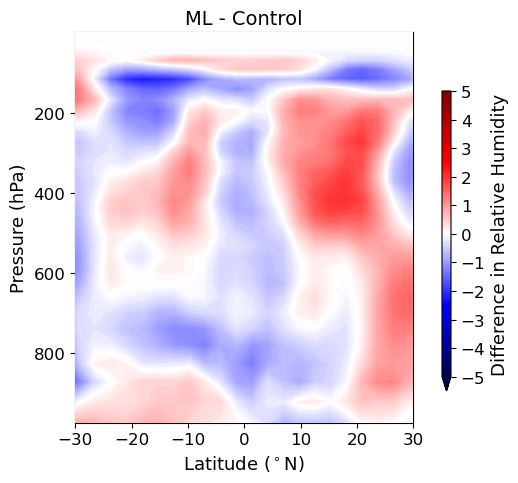

In [8]:
fig, axs = plt.subplots(figsize=(4.5, 5))

min = -5
max = 5.01
L = np.arange(min, max, 0.05) # filled contour levels
lines = [] # contour line levels
Z = 30 # zoom

difference = f.zonal_mean_rh_plot_for_grid(ml - control, ax = axs, exp = 'ML - Control' , cmap1='seismic', levels = L, zoom=Z, contour_levels = lines, seasonal_avg = True, Season = 'DJF', sub_label_season=False);

f.colorbar(c = difference, figure = fig, colorbar_label = 'Difference in Relative Humidity', colorbar_ticks = np.arange(min, max, 1))
fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_zonalrh_diff_DJF.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_45031/4223027471.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


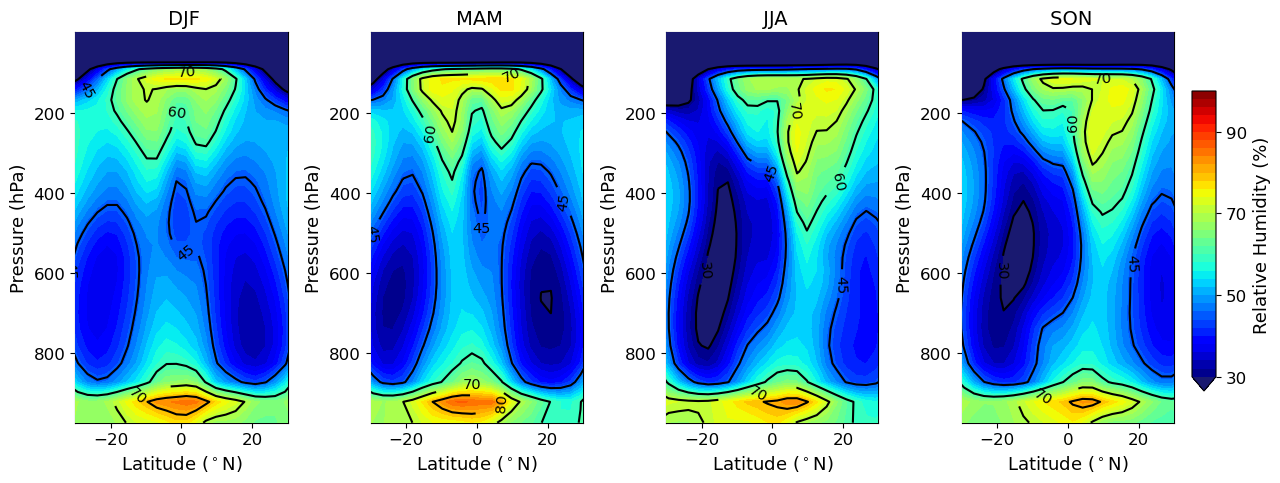

In [9]:
fig, axs = plt.subplots(ncols= 4, nrows = 1, figsize=(12, 5))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 45, 60, 70, 80, 90] # contour line levels

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(4):
    season = seasons[i]
    contours = f.zonal_mean_rh_plot_for_grid(ml,ax = axs[i], exp = '', levels = L, zoom=30, contour_levels = lines, seasonal_avg=True, Season = season);


#plt.suptitle(r'Earth-Like Isca ($RH_{SBM}$ = 0.7, $\tau_{SBM}$ = 2h):' + '\n Zonally and Seasonally Averaged Relative Humidity Humidity Distribution', fontsize=20)

f.colorbar(contours,fig, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 20))

fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_zonal_rh_allseasonns.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_45031/3388738056.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


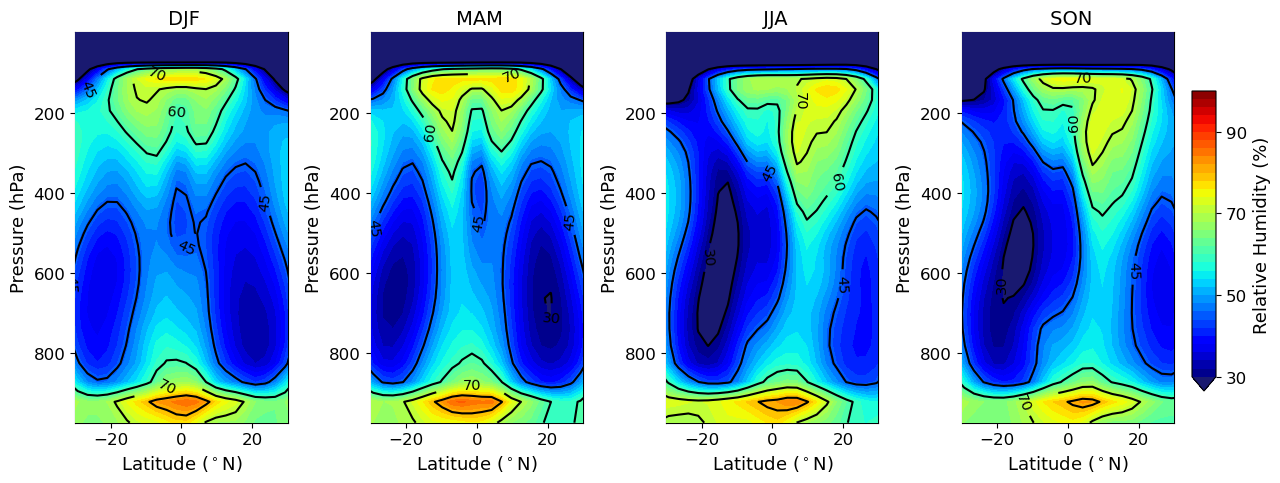

In [10]:
fig, axs = plt.subplots(ncols= 4, nrows = 1, figsize=(12, 5))

min = 30
L = np.arange(min, 101, 2) # filled contour levels
lines = [30, 45, 60, 70, 80, 90] # contour line levels

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(4):
    season = seasons[i]
    contours = f.zonal_mean_rh_plot_for_grid(control,ax = axs[i], exp = '', levels = L, zoom=30, contour_levels = lines, seasonal_avg=True, Season = season);


#plt.suptitle(r'Earth-Like Isca ($RH_{SBM}$ = 0.7, $\tau_{SBM}$ = 2h):' + '\n Zonally and Seasonally Averaged Relative Humidity Humidity Distribution', fontsize=20)

f.colorbar(contours,fig, 'Relative Humidity (%)', colorbar_ticks = np.arange(min, 101, 20))

fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/control_zonal_rh_allseasonns.png', bbox_inches='tight', pad_inches=0.1)

/tmp/ipykernel_45031/3813451676.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


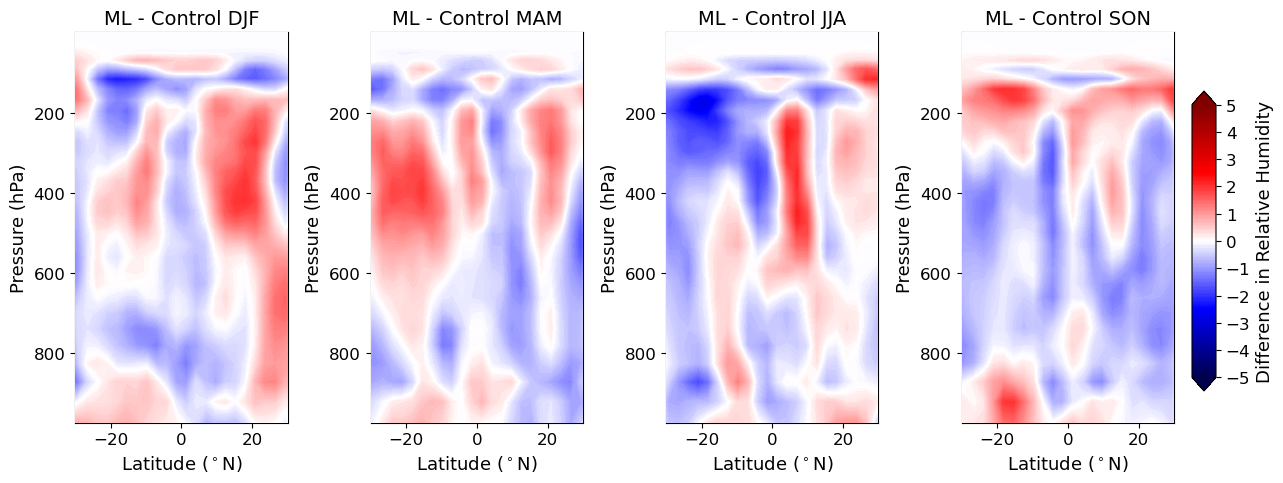

In [11]:
fig, axs = plt.subplots(ncols= 4, nrows = 1, figsize=(12, 5))

min = -5
max = 5.01
L = np.arange(min, max, 0.05) # filled contour levels
lines = [] # contour line levels
Z = 30 # zoom

diff = ml - control

seasons = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(4):
    season = seasons[i]
    contours = f.zonal_mean_rh_plot_for_grid(diff,ax = axs[i], exp = 'ML - Control' , cmap1='seismic', levels = L, zoom=Z, contour_levels = lines, seasonal_avg=True, Season = season, extend = 'both');


#plt.suptitle(r'Earth-Like Isca ($RH_{SBM}$ = 0.7, $\tau_{SBM}$ = 2h):' + '\n Zonally and Seasonally Averaged Relative Humidity Humidity Distribution', fontsize=20)

f.colorbar(c = contours, figure = fig, colorbar_label = 'Difference in Relative Humidity', colorbar_ticks = np.arange(min, max, 1))
fig.tight_layout()
#plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ml_minus_control_zonal_rh_allseasonns.png', bbox_inches='tight', pad_inches=0.1)

Spatial Plots comparing ML, Control and Difference

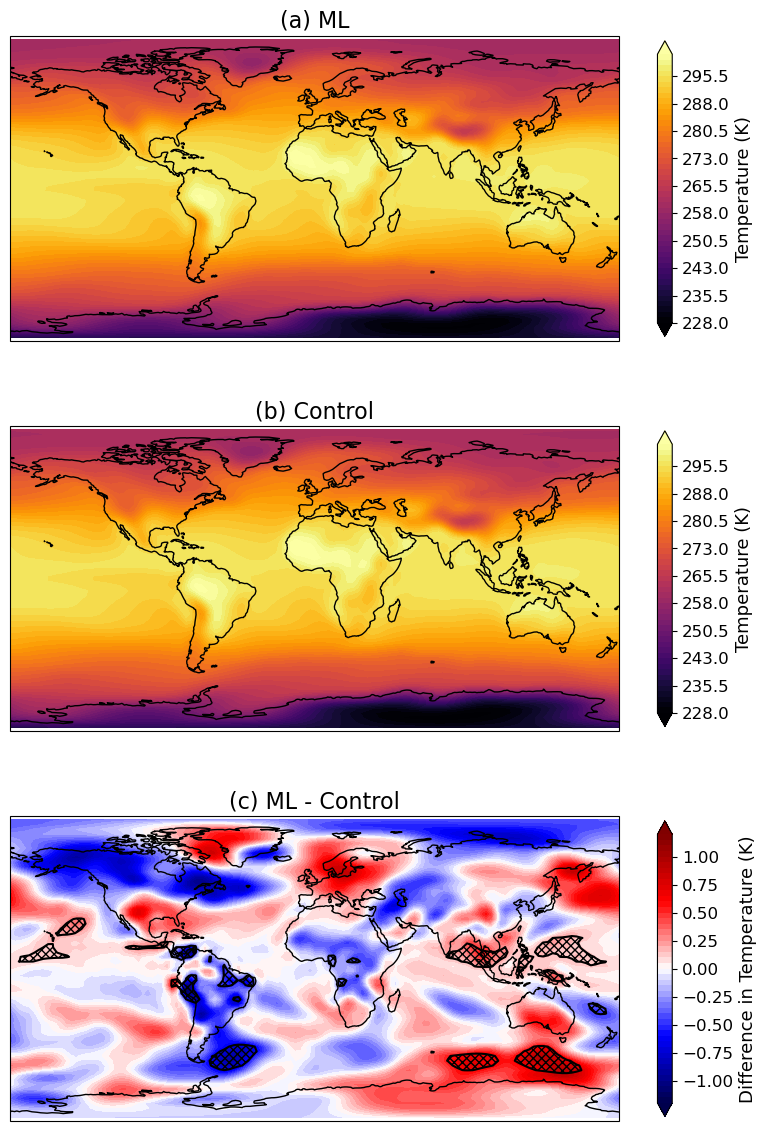

In [10]:
f.spatial_plot_gridded(ml, control, 'temp', cbar_labels = ['Temperature (K)', 'Temperature (K)', 'Difference in Temperature (K)'], contour_levels = [60, 60, np.arange(-1.2, 1.2+.05, 0.05)], cmap='inferno');
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/spatial_surfacetemp.png', bbox_inches='tight', pad_inches=0.1)

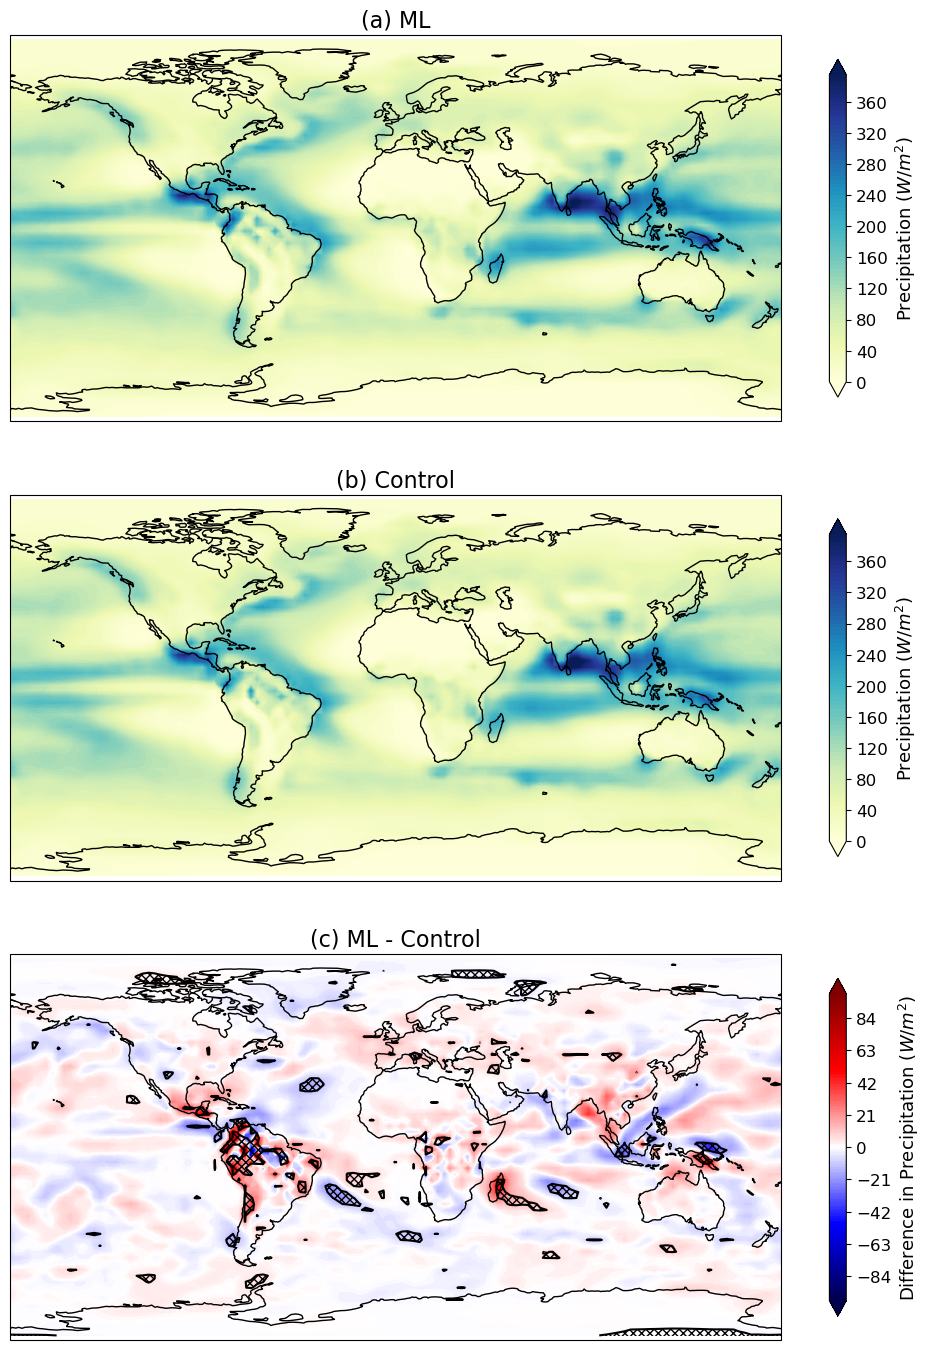

In [14]:
f.spatial_plot_gridded_noverticaldim(ml, control, 'precipitation', cbar_labels = ['Precipitation ($W/m^2$)', 'Precipitation ($W/m^2$)', 'Difference in Precipitation ($W/m^2$)'], contour_levels = [np.arange(0, 400, 5), np.arange(0, 400, 5), np.arange(-100, 100.1, 1 )], cmap = 'YlGnBu');
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/spatial_precipitation.png', bbox_inches='tight', pad_inches=0.1)

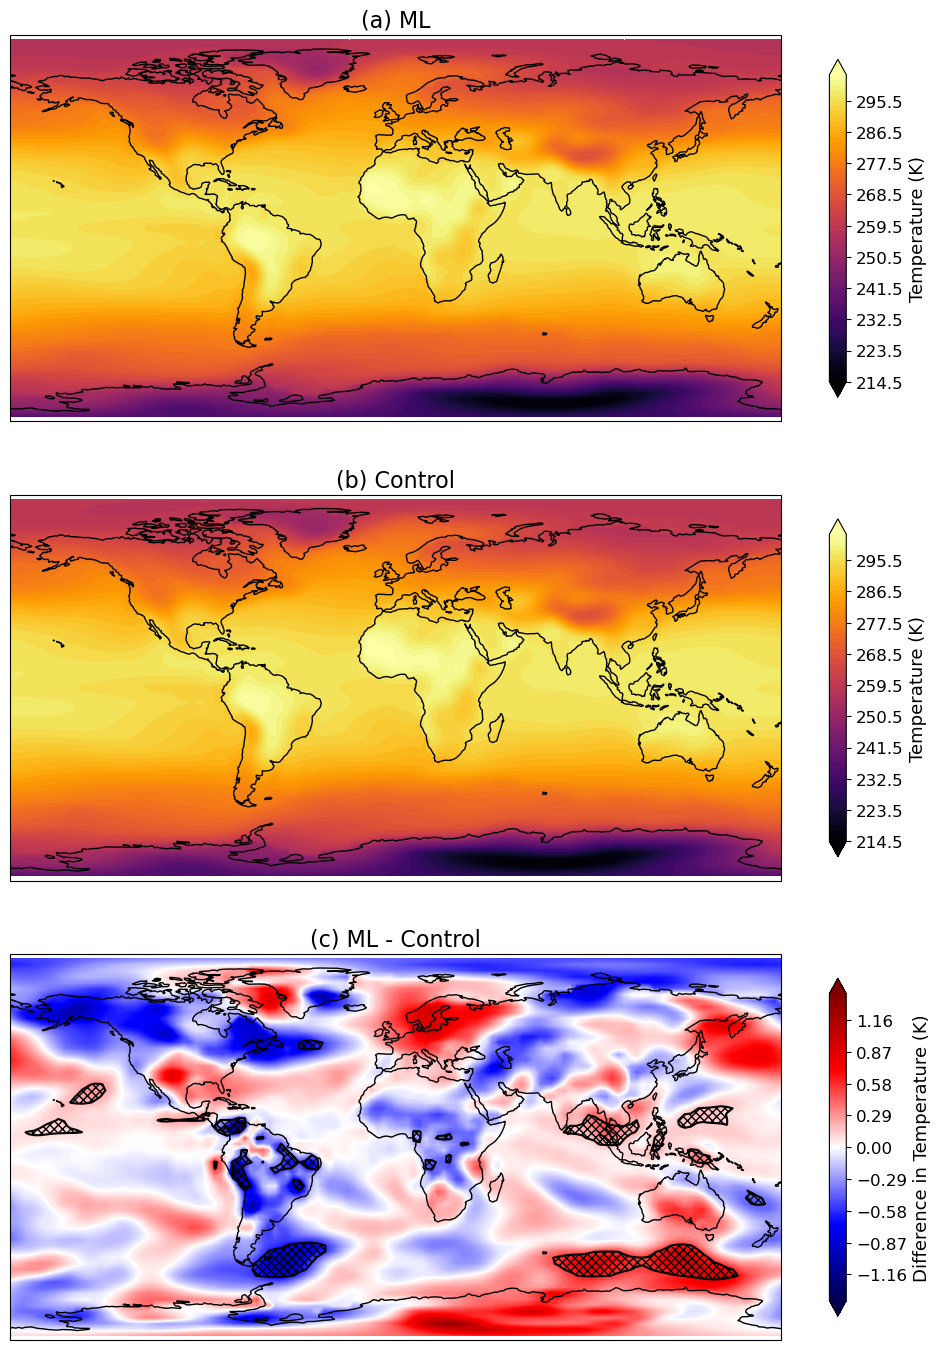

In [9]:
f.spatial_plot_gridded_noverticaldim(ml, control, 'temp_2m', cbar_labels = ['Temperature (K)', 'Temperature (K)', 'Difference in Temperature (K)'], contour_levels=[60, 60, np.arange(-1.4, 1.4+.01,.01 )], cmap='inferno');
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/spatial_t2m.png', bbox_inches='tight', pad_inches=0.1)

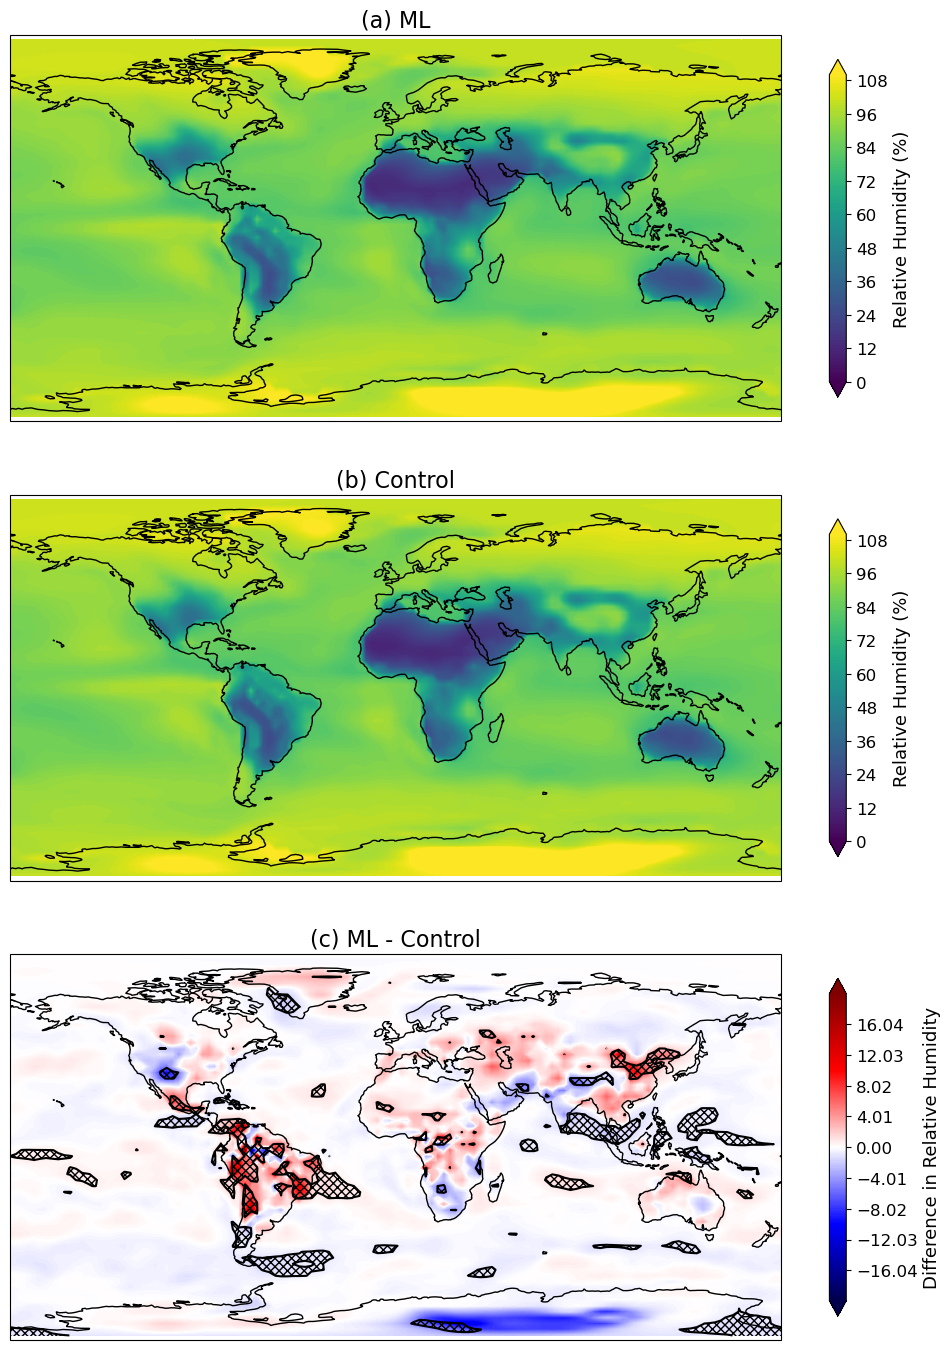

In [16]:
f.spatial_plot_gridded_noverticaldim(ml, control, 'rh_2m', cbar_labels = ['Relative Humidity (%)', 'Relative Humidity (%)', 'Difference in Relative Humidity'], contour_levels=[np.arange(0, 111, 1), np.arange(0, 111, 1), np.arange(-20, 20+.01,.01 )]);
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/spatial_rh_2m.png', bbox_inches='tight', pad_inches=0.1)

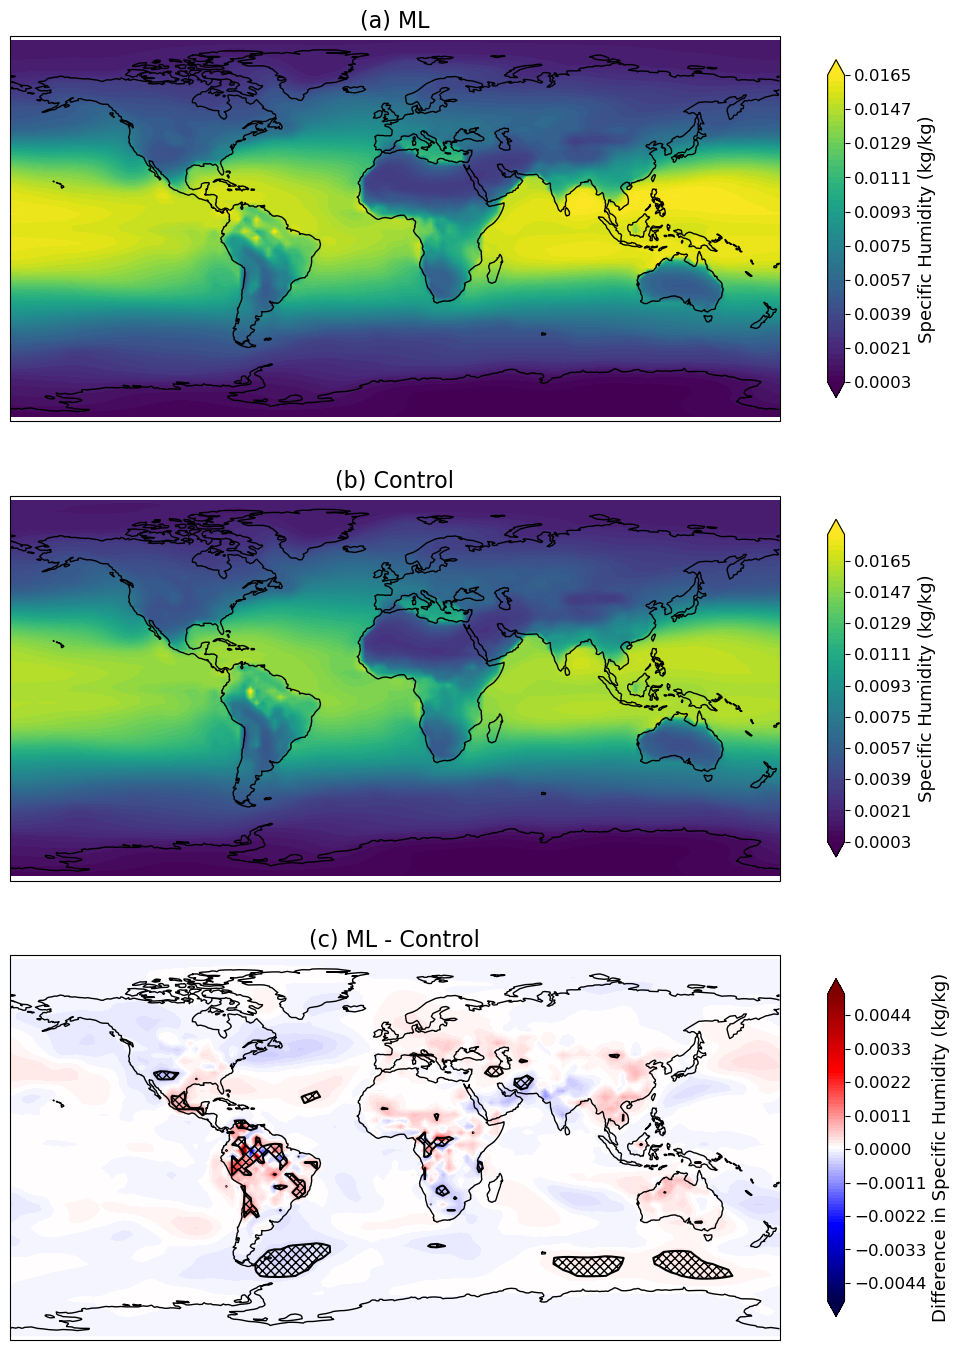

In [38]:
f.spatial_plot_gridded_noverticaldim(ml, control, 'sphum_2m', cbar_labels = ['Specific Humidity (kg/kg)', 'Specific Humidity (kg/kg)', 'Difference in Specific Humidity (kg/kg)'], contour_levels=[60, 60, np.arange(-0.005, .005+.0001, .0001) ]);
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/spatial_sphum_2m.png', bbox_inches='tight', pad_inches=0.1)

Zonally and time averaged temperature for pert_t and temp to show that there isn't a drastic difference

<>:9: SyntaxWarning: invalid escape sequence '\c'
<>:9: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_49014/3276252399.py:9: SyntaxWarning: invalid escape sequence '\c'
  axs[i].set_xlabel('Latitude ($^\circ$N)')


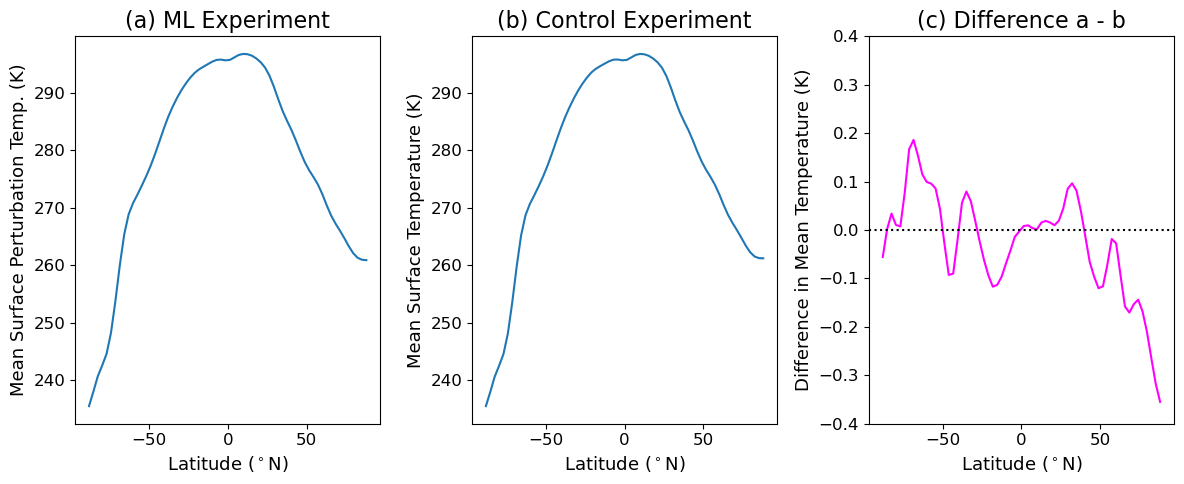

In [33]:
fig, axs = plt.subplots(figsize = (12, 5), nrows = 1, ncols = 3)
ml.sel(pfull = 1000, method = 'nearest').pert_t.mean(dim = ['lon', 'time']).plot(ax = axs[0])
control.sel(pfull = 1000, method = 'nearest').temp.mean(dim = ['lon', 'time']).plot(ax = axs[1])
(ml.sel(pfull = 1000, method = 'nearest').pert_t.mean(dim = ['lon', 'time']) - control.sel(pfull = 1000, method = 'nearest').temp.mean(dim = ['lon', 'time'])).plot(ax = axs[2], color = 'magenta')
axs[0].set_title('(a) ML Experiment')
axs[1].set_title('(b) Control Experiment')
axs[2].set_title('(c) Difference a - b')
for i in range(0, 3):
    axs[i].set_xlabel('Latitude ($^\circ$N)')
axs[0].set_ylabel('Mean Surface Perturbation Temp. (K)')   
axs[1].set_ylabel('Mean Surface Temperature (K)') 
axs[2].set_ylabel('Difference in Mean Temperature (K)')
axs[2].set_ylim(-0.4, 0.4)
axs[2].axhline(y=0, color = 'k', linestyle = ':')
fig.tight_layout()

plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/mean_surface_pert_t_vs_temp.png', bbox_inches='tight', pad_inches=0.1)

#Make overall title Zonally and time-Averaged Mean Surface Temperature
# Basically the point is that adding the ML perturbations doesn't have a drastic impact on the mean surface temperature, 
# but does seem to lead to cooler North pole, warmer SH

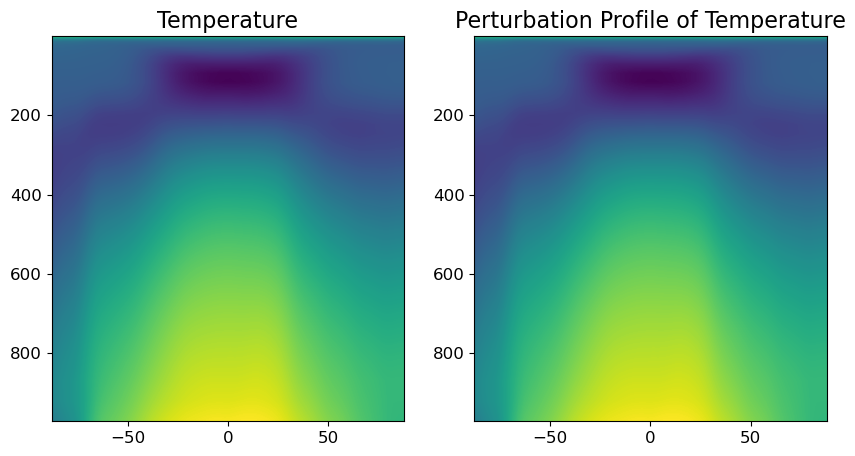

In [97]:
cols = 2
fig, axs = plt.subplots(figsize = (10, 5), nrows = 1, ncols = cols)
temp = ml.temp.mean(dim = ['lon', 'time'])
pert_temp = ml.pert_t.mean(dim = ['lon', 'time'])
#diff = (ml.pert_t - ml.temp).mean(dim = ['lon', 'time'])

upper_lim = np.round(np.maximum(temp.values.max(), pert_temp.values.max())+0.5)
lower_lim = np.round(np.minimum(temp.values.min(), pert_temp.values.min())-0.5)

axs[0].contourf(temp.lat, temp.pfull, temp.values, levels = np.arange(lower_lim, upper_lim + 0.25, 0.25))
axs[1].contourf(pert_temp.lat, pert_temp.pfull, pert_temp.values, levels = np.arange(lower_lim, upper_lim + 0.25, 0.25))

axs[0].set_title('Temperature')
axs[1].set_title('Perturbation Profile of Temperature')
for i in range(cols):
    axs[i].invert_yaxis()

Zonally Averaged Precip 

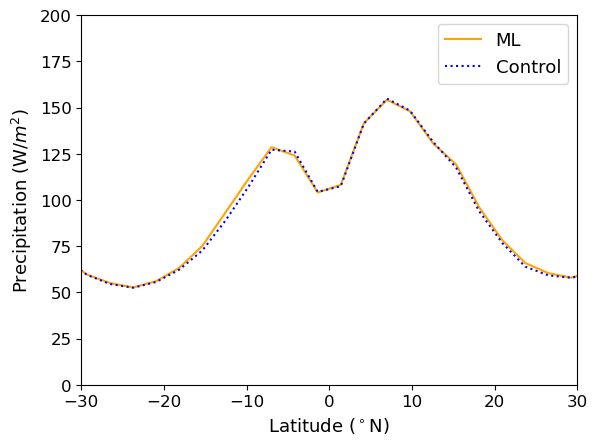

In [141]:
f.precipitation_plot([ml, control], ['ML', 'Control'], zoom = 30, colours = ['orange', 'blue'], styles = ['-', ':'], ymax = 200)
plt.savefig('/home/links/sr850/isca_results/my_results/Plots/ML/ML_precip_annual.png', bbox_inches='tight', pad_inches=0.1)

Equivalent but seasonally averaged:

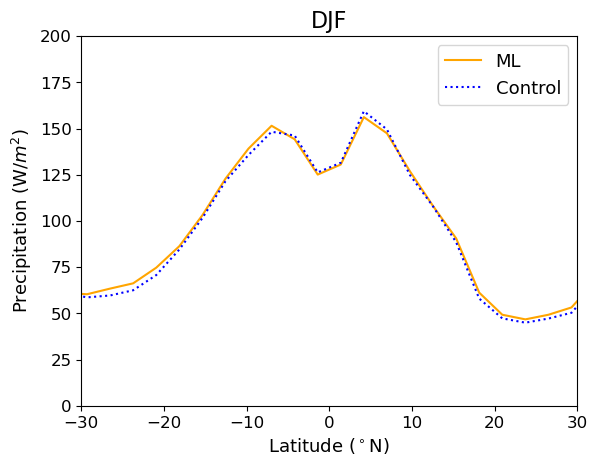

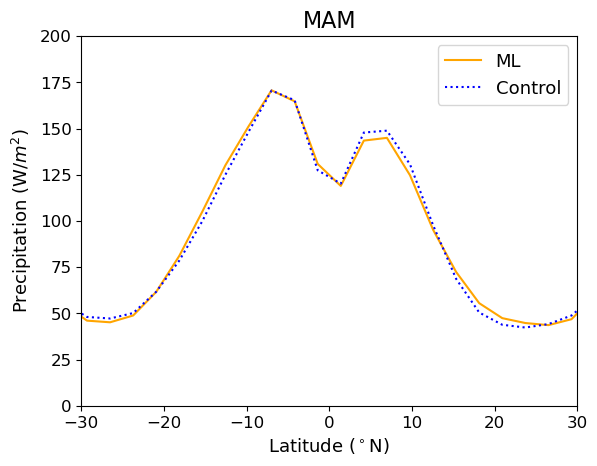

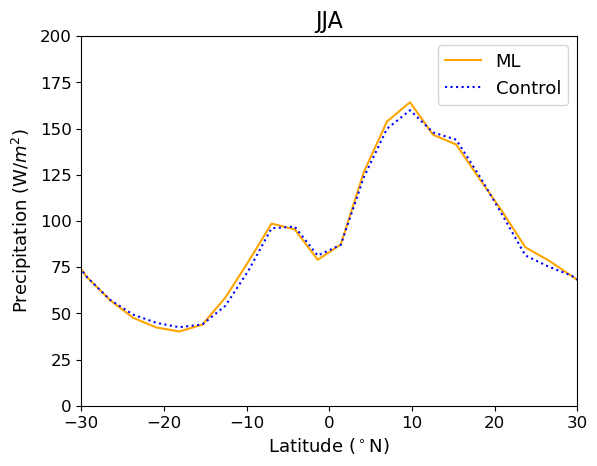

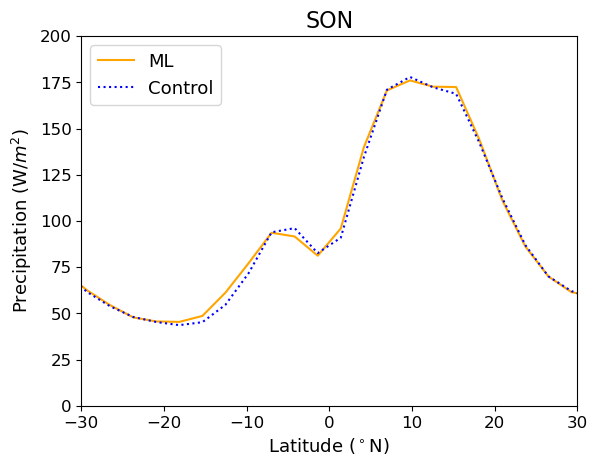

In [142]:
for s in ['DJF', 'MAM', 'JJA', 'SON']:
    fig = plt.figure()
    f.precipitation_plot([ml, control], ['ML', 'Control'], zoom = 30, colours = ['orange', 'blue'], styles = ['-', ':'],seasonal_avg=True, Season=s, ymax = 200)
    plt.title(f'{s}')
    plt.savefig(f'/home/links/sr850/isca_results/my_results/Plots/ML/ML_precip_{s}.png', bbox_inches='tight', pad_inches=0.1)

In [43]:
import seaborn as sns

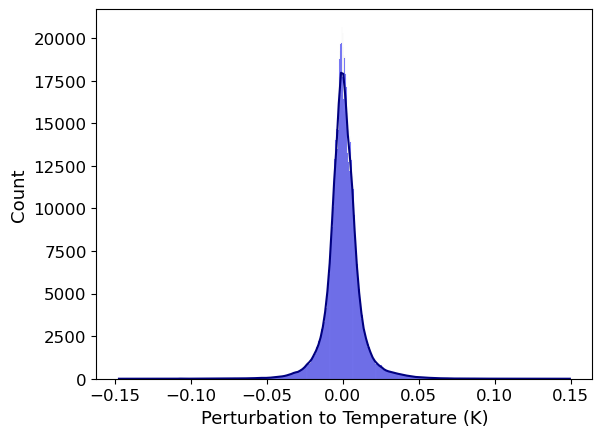

In [68]:
# This is a histogram of all the temperature perturbations at the surface across the full 10 years
p = 1000
pressure_surface_data = ml_full.sel(pfull=p, method='nearest')
temp = pressure_surface_data.temp
pert_temp = pressure_surface_data.pert_t
temp_difference = (pert_temp - temp).values
temp_difference = temp_difference.reshape(240*64*128)
ax = sns.histplot(temp_difference,color = 'blue', kde=True, stat = 'count')
ax.lines[0].set_color('navy')
plt.xlabel('Perturbation to Temperature (K)')
plt.savefig(f'/home/links/sr850/isca_results/my_results/Plots/ML/ML_pert_hist.png', bbox_inches='tight', pad_inches=0.1)

Plot of Height Function

In [144]:
h = []
for i in range(len(levels)):
    h.append(ml.pfull.values[i]/ml.phalf.values[i+1])

Text(0.5, 0, '$\\frac{\\text{P_full}}{\\text{P_half}}$')

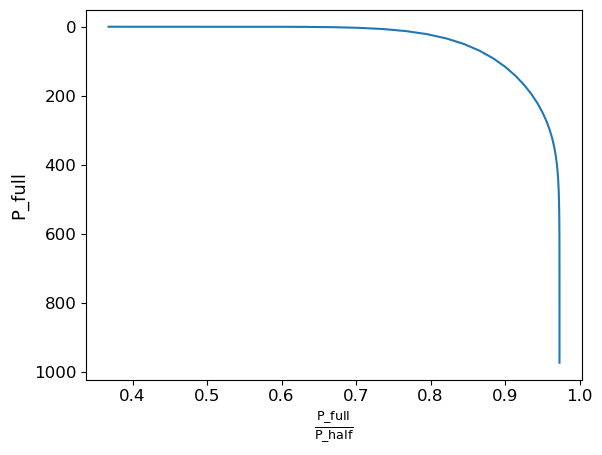

In [145]:
fig, ax = plt.subplots()
ax.plot(h, ml.pfull.values)
ax.invert_yaxis()
plt.ylabel('P_full')
plt.xlabel(r'$\frac{\text{P_full}}{\text{P_half}}$')